# Importação dos dados e biliotecas necessárias

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import requests  
# Carregar os dados
agencias = pd.read_csv('Dados/agencias.csv')
clientes = pd.read_csv('Dados/clientes.csv')
colab_agencia = pd.read_csv('Dados/colaborador_agencia.csv')
colaboradores = pd.read_csv('Dados/colaboradores.csv')
contas = pd.read_csv('Dados/contas.csv')
propostas_credito = pd.read_csv('Dados/propostas_credito.csv')
transacoes = pd.read_csv('Dados/transacoes.csv')

# 1 Apresente sua análise exploratória realizada a partir dos dados apresentados e cite quais perguntas de negócio podemos responder a fim de mostrar o valor que dados possuem para a empresa

## Na Análise abaixo comecei alterando algumas colunas para o tipo certo delas para realizar a análise, de acordo com a análise podemos ter noção da distribuição de idade dos clientes, que AM é o estado com maior número de Clientes e que 100% dos clientes são Pessoas físicas 

### Análise Questão 1 

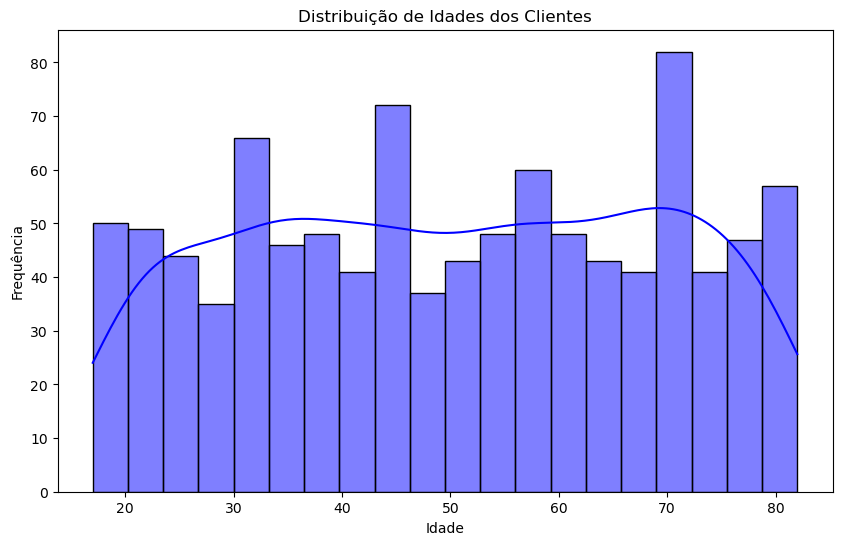

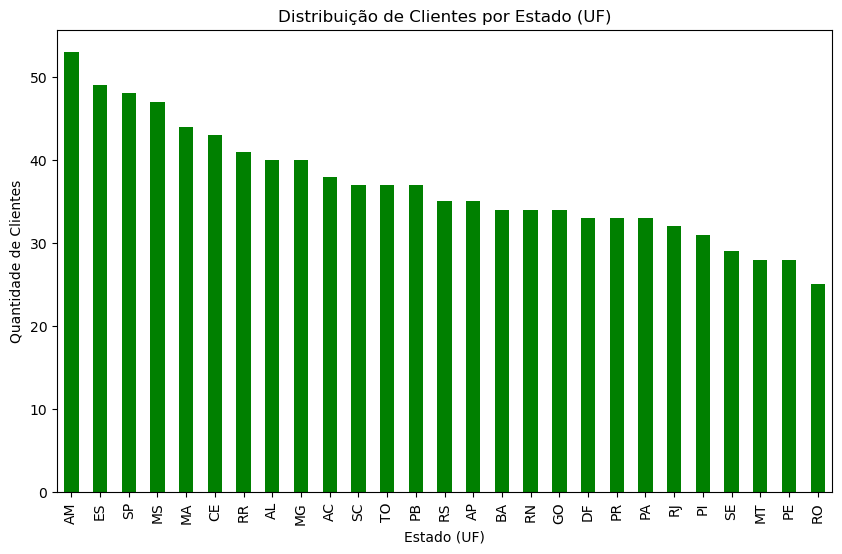

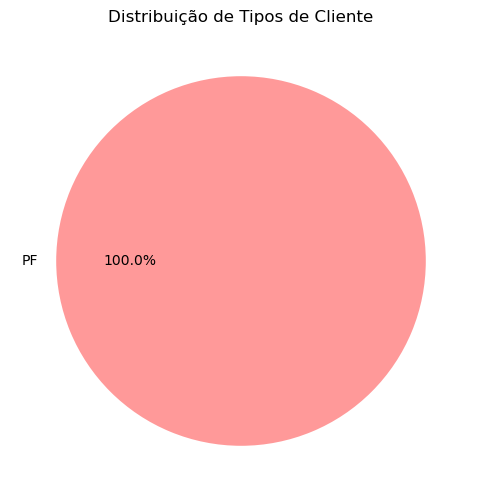

In [5]:
clientes['data_nascimento'] = pd.to_datetime(clientes['data_nascimento'])
clientes['idade'] = (pd.Timestamp.now() - clientes['data_nascimento']).dt.days // 365
transacoes.loc[:, 'data_transacao'] = pd.to_datetime(transacoes['data_transacao'], errors='coerce')
transacoes = transacoes.dropna(subset=['data_transacao'])


# Distribuição de idades
plt.figure(figsize=(10, 6))
sns.histplot(clientes['idade'], bins=20, kde=True, color='blue')
plt.title('Distribuição de Idades dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Clientes por localização (UF)
clientes_por_uf = clientes['endereco'].str.extract(r'\b([A-Z]{2})\b', expand=False).value_counts()
plt.figure(figsize=(10, 6))
clientes_por_uf.plot(kind='bar', color='green')
plt.title('Distribuição de Clientes por Estado (UF)')
plt.xlabel('Estado (UF)')
plt.ylabel('Quantidade de Clientes')
plt.show()

# Tipos de cliente
plt.figure(figsize=(6, 6))
clientes['tipo_cliente'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribuição de Tipos de Cliente')
plt.ylabel('')
plt.show()


# 2 Quais serão os indicadores ou análises utilizadas para responder às perguntas de negócio citadas anteriormente? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores/análises citados nessa entrega.


## Distribuição de Idades dos Clientes Indicador: Idade dos clientes calculada a partir da data de nascimento. Análise: Histograma da distribuição de idades, identificando padrões ou faixas etárias predominantes. Clientes por Localização (UF) Indicador: Contagem de clientes por unidade federativa (UF). Análise: Gráfico de barras mostrando a distribuição de clientes em diferentes estados. Tipos de Clientes Indicador: Proporção de tipos de clientes (ex.: pessoa física, pessoa jurídica). Análise: Gráfico de pizza exibindo a representatividade de cada tipo de cliente no total.

# 3 Uma dimensão de datas bem construída viabiliza a elaboração de análises mais robustas com relação ao tempo. O BanVic quer começar seu Data Warehouse (DW) com uma dim_dates que atenda seus requisitos de análise. Utilizando uma dimensão de datas, responda às duas perguntas a seguir. Por fim, proponha outras duas análises utilizando a dim_dates que possam ter valor de negócio para o BanVic. Pergunta prática e teórica.


# Qual trimestre tem, em média, mais transações aprovadas e qual tem, também em média,  maior volume movimentado?


## 4° Trimestre

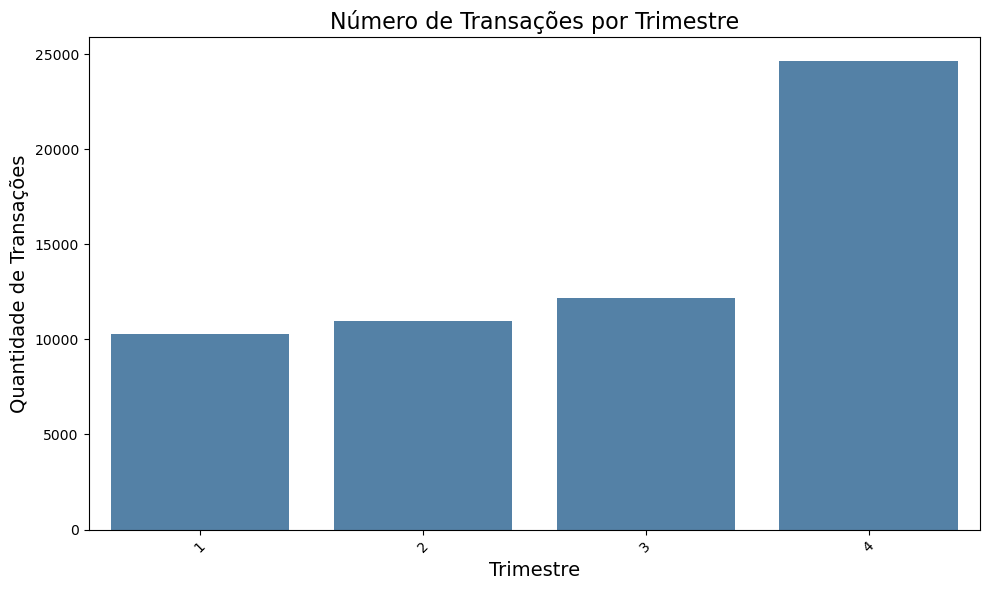

In [21]:
# 1. Criei a coluna 'trimestre'
transacoes.loc[:, 'trimestre'] = transacoes['data_transacao'].apply(lambda x: x.quarter)
# 2. Análisei o número de transações e volume por trimestre
trimestre_analysis = transacoes.groupby('trimestre').agg(
    transacoes_count=('cod_transacao', 'count'),
    volume_total=('valor_transacao', 'sum')
).reset_index()
# 3.Gráfico do número de transações por trimestre
plt.figure(figsize=(10, 6))
sns.barplot(data=trimestre_analysis, x='trimestre', y='transacoes_count', color='steelblue')
plt.title('Número de Transações por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Quantidade de Transações', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Um analista sugeriu que, meses que contém R no seu nome (Ex: janeiRo), tem um padrão de quantidade de transações diferentes dos meses que não apresentam R no nome (Ex: junho). Apresente suas análises validando ou não essa afirmação.


## De acordo com a Análise abaixo essa informação é verdadeira.

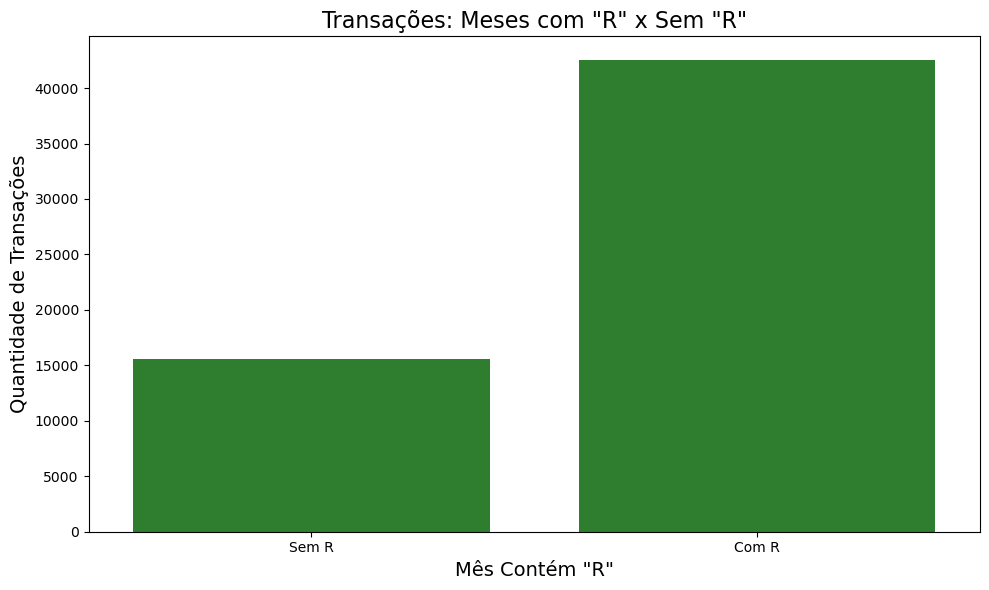

In [33]:
# 1. Criando a coluna 'mes_com_R', verificando se o nome do mês contém 'r'
transacoes.loc[:, 'mes_com_R'] = transacoes['data_transacao'].dt.month_name(locale='en_US').str.contains('r', case=False)

# 2. Analisando o número de transações e o volume total por meses com R no nome
mes_r_analysis = transacoes.groupby('mes_com_R').agg(
    transacoes_count=('cod_transacao', 'count'),
    volume_total=('valor_transacao', 'sum')
).reset_index()

# 3. Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=mes_r_analysis, x='mes_com_R', y='transacoes_count', color='forestgreen')
plt.title('Transações: Meses com "R" x Sem "R"', fontsize=16)
plt.xlabel('Mês Contém "R"', fontsize=14)
plt.ylabel('Quantidade de Transações', fontsize=14)
plt.xticks([0, 1], ['Sem R', 'Com R'], rotation=0)
plt.tight_layout()
plt.show()

# 4. André Tech, o especialista em tecnologia, solicitou que você buscasse fontes de dados públicas que poderiam ser utilizadas para enriquecer a base de dados do BanVic e ampliar as possibilidades de análise, considerando principalmente a necessidade atual apresentada. Pergunta prática e teórica

## Traga uma proposta de possíveis dados públicos a serem utilizados no Data Warehouse apresentando o valor que eles podem trazer para o desafio apresentado

### Taxas de juros básicas (Selic), taxa de inflação (IPCA), PIB (Produto Interno Bruto), câmbio

##  Um exemplo de dado externo é o Índice Nacional de Preços ao Consumidor Amplo. Considerando o IPCA no Brasil para o período apresentado na base de dados da BanVic, avalie se existe alguma relação do índice de preços com o volume de transações e/ou com o valor transacionado no período. Apresente suas análises e justifique sua opinião.


### De acordo com a Análise abaixo que eu fiz entre a relação entre ipca e volume/valor de transações. Os dados não sugerem uma correlação forte ou evidente entre o IPCA e o no valor das transações no período analisado. Possivelmente outros fatores econômicos tenham maior impacto no comportamento financeiro dos clientes do BanVic 

Dados do IPCA baixados com sucesso.


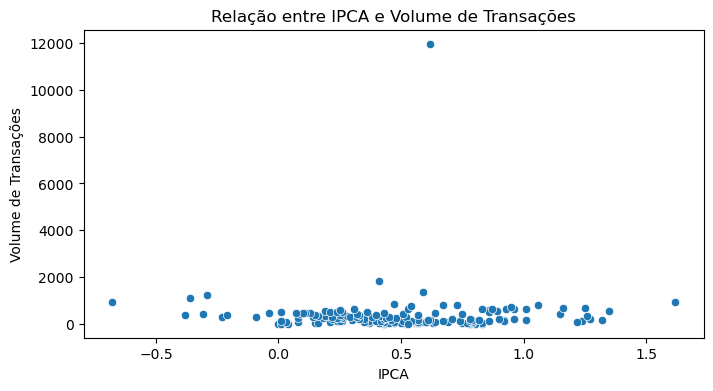

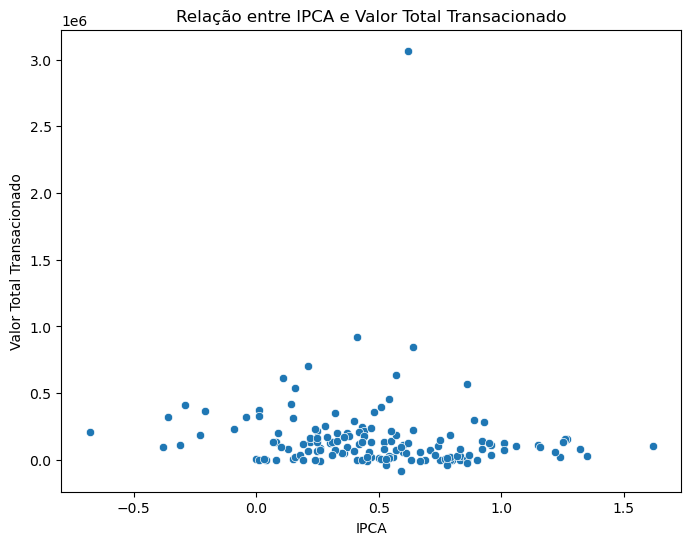

In [68]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL da API do Banco Central
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=csv"  # IPCA acumulado no ano

# Baixar os dados
response = requests.get(url)
if response.status_code == 200:
    with open("ipca.csv", "wb") as file:
        file.write(response.content)
    print("Dados do IPCA baixados com sucesso.")
else:
    print(f"Erro ao baixar os dados: {response.status_code}")

# Ler os dados em um DataFrame
ipca = pd.read_csv("ipca.csv", sep=";", decimal=",")
# Convertendo a coluna data em data
ipca['data'] = pd.to_datetime(ipca['data'], format='%d/%m/%Y')
ipca.rename(columns={'valor': 'ipca'}, inplace=True)

#______________________________________________________________________
# Bases de transações

# Remover informações de timezone da data_transacao
transacoes['data_transacao'] = transacoes['data_transacao'].dt.tz_localize(None)

# Agregar o volume e valor de transações por mês
transacoes_mensais = transacoes.groupby(transacoes['data_transacao'].dt.to_period('M')).agg(
    volume=('cod_transacao', 'count'),
    valor_total=('valor_transacao', 'sum')
).reset_index()

# Converter o período para datetime
transacoes_mensais['data'] = transacoes_mensais['data_transacao'].dt.to_timestamp()
transacoes_mensais.drop(columns=['data_transacao'], inplace=True)

#__________________________________________________
# Mesclar as datas
dados_analise = pd.merge(transacoes_mensais, ipca, on='data', how='inner')

#___________________________________________________
# Gráfico: Relação entre IPCA e Volume de Transações
plt.figure(figsize=(8, 4))
sns.scatterplot(data=dados_analise, x='ipca', y='volume')
plt.title('Relação entre IPCA e Volume de Transações')
plt.xlabel('IPCA')
plt.ylabel('Volume de Transações')
plt.show()

# Gráfico: Relação entre IPCA e Valor Total Transacionado
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dados_analise, x='ipca', y='valor_total')
plt.title('Relação entre IPCA e Valor Total Transacionado')
plt.xlabel('IPCA')
plt.ylabel('Valor Total Transacionado')
plt.show()


## Quais decisões poderiam ser facilitadas com o uso desses novos dados? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer esses dados externos.

### Ajuste de Preços: Empresas podem usar o IPCA para ajustar seus preços de acordo com a inflação. Por exemplo, se o IPCA estiver aumentando, as empresas podem ajustar seus preços para manter as margens de lucro ou para se alinhar às expectativas do mercado. 

In [73]:
pip install pdfkit
